# PyTorch Neural Network Classification

## Make classification data

In [131]:
import numpy as np
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03, 
                    random_state=42)

In [132]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [133]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({
    "X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [134]:
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

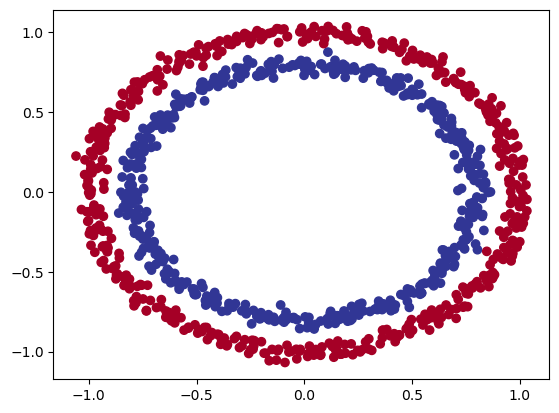

In [135]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu);

### Input and output shapes

In [136]:
X.shape, y.shape

((1000, 2), (1000,))

In [137]:
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### Turn data into tensors and create train and test splits

In [138]:
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [139]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    stratify=y, 
                                                    random_state=42) 

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Building a model

In [140]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [141]:
class CircleModelV0(nn.Module):
    def __init__(self, in_features, n_hidden, out_features):
        super().__init__()
        
        self.layer_1 = nn.Linear(in_features=in_features, out_features=n_hidden)
        self.layer_2 = nn.Linear(in_features=n_hidden, out_features=out_features)
    
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) 
    
in_features = X_train.shape[1]
n_hidden = 10
out_features = 1

model_0 = CircleModelV0(in_features, n_hidden, out_features).to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=1, bias=True)
)

In [142]:
# Replicate CircleModelV0 with nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [143]:
# Make predictions with the model
untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.3153],
        [-0.1702],
        [-0.2237],
        [-0.0589],
        [-0.0882],
        [-0.2808],
        [-0.3557],
        [-0.1694],
        [-0.1138],
        [-0.3735]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 0., 0., 1., 1., 1., 1., 0., 0.])


### Setup loss function and optimizer

| Loss function/Optimizer | Problem type | PyTorch Code |
| ----- | ----- | ----- |
| Stochastic Gradient Descent (SGD) optimizer | Classification, regression, many others. | [`torch.optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) |
| Adam Optimizer | Classification, regression, many others. | [`torch.optim.Adam()`](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html) |
| Binary cross entropy loss | Binary classification | [`torch.nn.BCELossWithLogits`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) or [`torch.nn.BCELoss`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) |
| Cross entropy loss | Mutli-class classification | [`torch.nn.CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html) |
| Mean absolute error (MAE) or L1 Loss | Regression | [`torch.nn.L1Loss`](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html) | 
| Mean squared error (MSE) or L2 Loss | Regression | [`torch.nn.MSELoss`](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html#torch.nn.MSELoss) |  

PyTorch has two binary cross entropy implementations:
1. [`torch.nn.BCELoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html) - Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
2. [`torch.nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) - This is the same as above except it has a sigmoid layer ([`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)) built-in (we'll see what this means soon).

In [144]:
loss_fn = nn.BCEWithLogitsLoss() 

optimizer = torch.optim.SGD(params=model_0.parameters(), 
                            lr=0.1)

In [145]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100 
    return acc

## Train model



### Going from raw model outputs to predicted labels (logits -> prediction probabilities -> prediction labels)

In [146]:
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.3153],
        [-0.1702],
        [-0.2237],
        [-0.0589],
        [-0.0882]], device='cuda:0', grad_fn=<SliceBackward0>)

In [147]:
# Use sigmoid on model logits
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4218],
        [0.4576],
        [0.4443],
        [0.4853],
        [0.4780]], device='cuda:0', grad_fn=<SigmoidBackward0>)

* If `y_pred_probs` >= 0.5, `y=1` (class 1)
* If `y_pred_probs` < 0.5, `y=0` (class 0)

In [148]:
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0', grad_fn=<SqueezeBackward0>)

In [149]:
y_test[:5]

tensor([1., 0., 0., 0., 1.])

### Building a training and testing loop

In [150]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device 
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred) 

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70014, Accuracy: 46.38% | Test loss: 0.69774, Test acc: 45.50%
Epoch: 10 | Loss: 0.69739, Accuracy: 46.00% | Test loss: 0.69538, Test acc: 48.00%
Epoch: 20 | Loss: 0.69623, Accuracy: 47.12% | Test loss: 0.69444, Test acc: 51.50%
Epoch: 30 | Loss: 0.69565, Accuracy: 48.12% | Test loss: 0.69400, Test acc: 52.00%
Epoch: 40 | Loss: 0.69527, Accuracy: 48.50% | Test loss: 0.69374, Test acc: 52.50%
Epoch: 50 | Loss: 0.69500, Accuracy: 48.75% | Test loss: 0.69357, Test acc: 51.50%
Epoch: 60 | Loss: 0.69477, Accuracy: 48.62% | Test loss: 0.69344, Test acc: 52.00%
Epoch: 70 | Loss: 0.69459, Accuracy: 49.00% | Test loss: 0.69334, Test acc: 52.50%
Epoch: 80 | Loss: 0.69442, Accuracy: 49.00% | Test loss: 0.69326, Test acc: 51.50%
Epoch: 90 | Loss: 0.69428, Accuracy: 49.00% | Test loss: 0.69319, Test acc: 51.50%


## Make predictions and evaluate the model

In [151]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


# Plot linear data or training and test and predictions (optional)
def plot_predictions(
    train_data, train_labels, test_data, test_labels, predictions=None
):
    """
  Plots linear training data and test data and compares predictions.
  """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14})

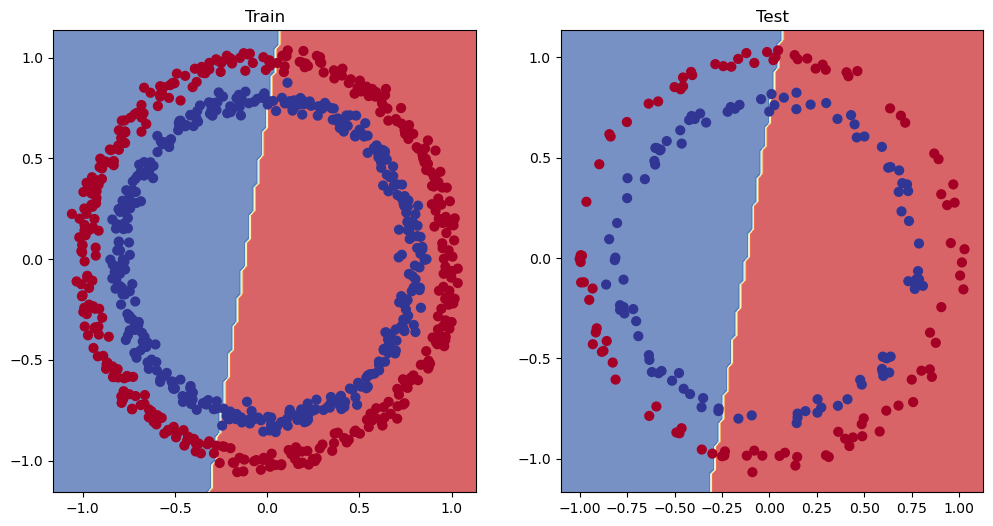

In [152]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [153]:
class CircleModelV1(nn.Module):
    def __init__(self, in_features, n_hidden, out_features):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=in_features, out_features=n_hidden)
        self.layer_2 = nn.Linear(in_features=n_hidden, out_features=n_hidden) 
        self.layer_3 = nn.Linear(in_features=n_hidden, out_features=out_features)
        
    def forward(self, x): 
        x = self.layer_1(x)
        x = self.layer_2(x)
        x = self.layer_3(x)
        return x

in_features = X_train.shape[1]
n_hidden = 10
out_features = 1

model_1 = CircleModelV1(in_features, n_hidden, out_features).to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [154]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [155]:
torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69378, Accuracy: 51.00% | Test loss: 0.69329, Test acc: 50.50%
Epoch: 100 | Loss: 0.69312, Accuracy: 50.00% | Test loss: 0.69349, Test acc: 47.50%
Epoch: 200 | Loss: 0.69309, Accuracy: 50.25% | Test loss: 0.69365, Test acc: 48.00%
Epoch: 300 | Loss: 0.69309, Accuracy: 50.88% | Test loss: 0.69370, Test acc: 48.00%
Epoch: 400 | Loss: 0.69309, Accuracy: 50.12% | Test loss: 0.69371, Test acc: 48.50%
Epoch: 500 | Loss: 0.69309, Accuracy: 50.12% | Test loss: 0.69371, Test acc: 48.50%
Epoch: 600 | Loss: 0.69309, Accuracy: 50.12% | Test loss: 0.69371, Test acc: 48.50%
Epoch: 700 | Loss: 0.69309, Accuracy: 50.12% | Test loss: 0.69371, Test acc: 48.50%
Epoch: 800 | Loss: 0.69309, Accuracy: 50.12% | Test loss: 0.69372, Test acc: 48.50%
Epoch: 900 | Loss: 0.69309, Accuracy: 50.12% | Test loss: 0.69372, Test acc: 48.50%


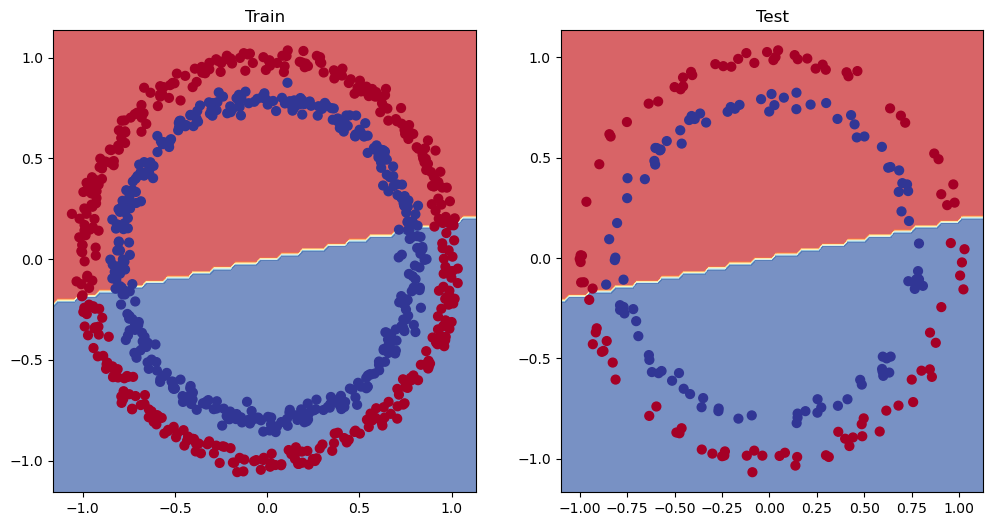

In [156]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

## Adding non-linearity 

In [157]:
from torchsummary import summary

In [158]:

class CircleModelV2(nn.Module):
    def __init__(self, in_features, n_hidden, out_features):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=in_features, out_features=n_hidden)
        self.layer_2 = nn.Linear(in_features=n_hidden, out_features=n_hidden) 
        self.layer_3 = nn.Linear(in_features=n_hidden, out_features=out_features)
        self.relu = nn.ReLU()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_3 = CircleModelV2(in_features, n_hidden, out_features).to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [159]:
# Setup loss and optimizer 
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

### Training a model with non-linearity

In [160]:
# Fit the model
torch.manual_seed(42)
epochs = 1000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69292, Accuracy: 50.00% | Test Loss: 0.69330, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69082, Accuracy: 53.37% | Test Loss: 0.69162, Test Accuracy: 51.50%
Epoch: 200 | Loss: 0.68897, Accuracy: 54.37% | Test Loss: 0.69058, Test Accuracy: 51.50%
Epoch: 300 | Loss: 0.68640, Accuracy: 54.87% | Test Loss: 0.68892, Test Accuracy: 51.00%
Epoch: 400 | Loss: 0.68268, Accuracy: 54.62% | Test Loss: 0.68598, Test Accuracy: 50.00%
Epoch: 500 | Loss: 0.67726, Accuracy: 53.87% | Test Loss: 0.68168, Test Accuracy: 50.00%
Epoch: 600 | Loss: 0.66883, Accuracy: 54.50% | Test Loss: 0.67453, Test Accuracy: 51.00%
Epoch: 700 | Loss: 0.65736, Accuracy: 58.38% | Test Loss: 0.66387, Test Accuracy: 57.50%
Epoch: 800 | Loss: 0.63915, Accuracy: 70.50% | Test Loss: 0.64595, Test Accuracy: 68.50%
Epoch: 900 | Loss: 0.60403, Accuracy: 79.00% | Test Loss: 0.60779, Test Accuracy: 77.50%


### Evaluating a model trained with non-linear activation functions


In [161]:
model_3.eval()

with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 0., 1., 1., 1., 1., 1., 0., 0.], device='cuda:0'),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

In [162]:
summary(model_3.to(device),(2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]              30
              ReLU-2                   [-1, 10]               0
            Linear-3                   [-1, 10]             110
              ReLU-4                   [-1, 10]               0
            Linear-5                    [-1, 1]              11
Total params: 151
Trainable params: 151
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


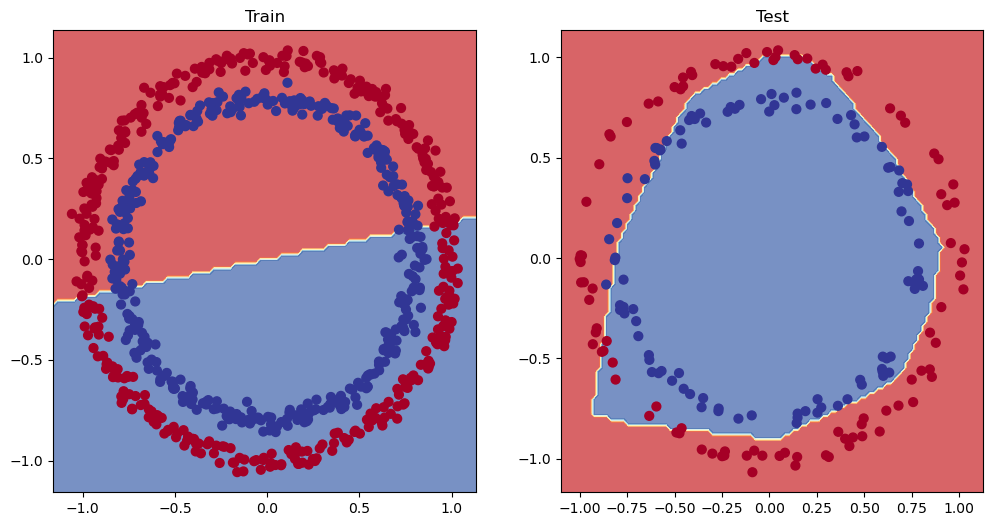

In [163]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

## Building a multi-class PyTorch model

tensor([[-8.4134,  6.9352],
        [-5.7665, -6.4312],
        [-6.0421, -6.7661],
        [ 3.9508,  0.6984],
        [ 4.2505, -0.2815]]) tensor([3, 2, 2, 1, 1])


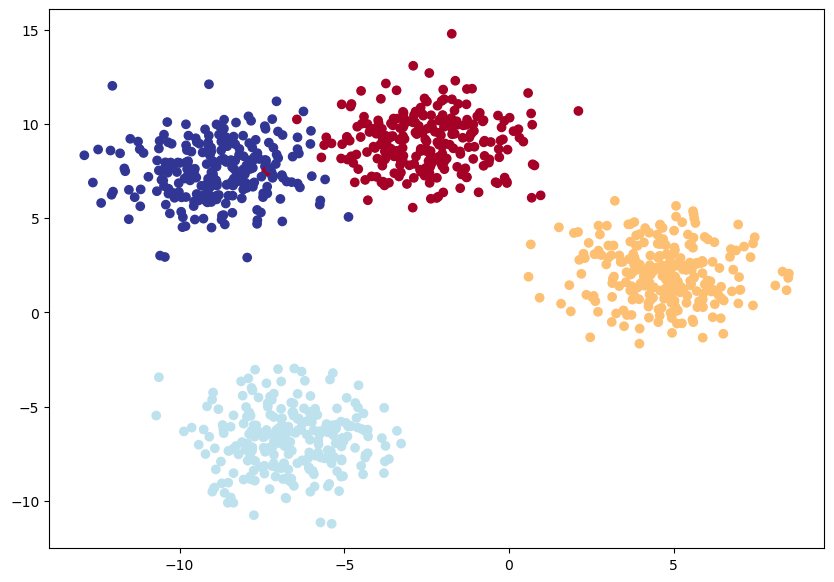

In [164]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [165]:
from torch import nn

class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features), 
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=NUM_FEATURES,
                    output_features=NUM_CLASSES,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

### Creating a loss function and optimizer for a multi-class PyTorch model

In [166]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), 
                            lr=0.1) 

### Getting prediction probabilities for a multi-class PyTorch model

In [167]:
model_4(X_blob_train.to(device))[:5]

tensor([[-1.0715,  0.1224, -0.2398,  0.1408],
        [ 2.2523,  1.4545,  0.4941, -0.0170],
        [ 0.6676,  0.1529,  0.5238, -0.0058],
        [ 0.7605,  0.3793,  0.4366,  0.0080],
        [ 2.0498,  1.2910,  0.4964, -0.0153]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [168]:
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES 

(torch.Size([4]), 4)

In [169]:
summary(model_4.to(device),(2,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                    [-1, 8]              24
            Linear-2                    [-1, 8]              72
            Linear-3                    [-1, 4]              36
Total params: 132
Trainable params: 132
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [170]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

y_pred_probs = torch.softmax(y_logits, dim=1) 
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7540,  0.2746, -0.1840,  0.1281],
        [ 3.3392,  1.6903,  0.8480, -0.0878],
        [ 0.2274,  0.0622,  0.3778,  0.0233],
        [-1.0563,  0.0362, -0.1839,  0.1312],
        [ 1.6460,  1.2873,  0.3171,  0.0191]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.1253, 0.3505, 0.2216, 0.3027],
        [0.7648, 0.1470, 0.0633, 0.0248],
        [0.2614, 0.2216, 0.3038, 0.2132],
        [0.1036, 0.3089, 0.2479, 0.3397],
        [0.4630, 0.3234, 0.1226, 0.0910]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [171]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

In [172]:
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.1253, 0.3505, 0.2216, 0.3027], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(1, device='cuda:0')


### Creating a training and testing loop for a multi-class PyTorch model


In [173]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

Epoch: 0 | Loss: 1.74569, Acc: 41.88% | Test Loss: 0.83359, Test Acc: 67.50%
Epoch: 10 | Loss: 0.19535, Acc: 98.25% | Test Loss: 0.17281, Test Acc: 98.00%
Epoch: 20 | Loss: 0.09700, Acc: 99.00% | Test Loss: 0.08885, Test Acc: 99.50%
Epoch: 30 | Loss: 0.06794, Acc: 99.00% | Test Loss: 0.06073, Test Acc: 99.50%
Epoch: 40 | Loss: 0.05448, Acc: 99.00% | Test Loss: 0.04710, Test Acc: 99.50%
Epoch: 50 | Loss: 0.04693, Acc: 99.12% | Test Loss: 0.03928, Test Acc: 99.50%
Epoch: 60 | Loss: 0.04218, Acc: 99.12% | Test Loss: 0.03427, Test Acc: 99.50%
Epoch: 70 | Loss: 0.03895, Acc: 99.12% | Test Loss: 0.03080, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03663, Acc: 99.12% | Test Loss: 0.02827, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03489, Acc: 99.12% | Test Loss: 0.02635, Test Acc: 99.50%


In [174]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[  6.3259,  11.6797, -10.9105,  -6.6232],
        [  4.1787, -10.8103,   2.5645,   9.7251],
        [-10.7265, -15.3529,  16.5745,   8.4042],
        [  2.4719,   8.0900,  -6.0207,  -5.1354],
        [ 10.5392,   5.6537, -11.0353,  -0.7131],
        [  4.5688, -13.5920,   3.7197,  11.9565],
        [-10.8269, -12.2734,  15.0371,   6.0397],
        [  8.5960,   1.2454,  -7.2065,   2.0051],
        [-11.4554, -20.6795,  19.9379,  12.2058],
        [  9.1315,   2.8178,  -8.4493,   0.9852]], device='cuda:0')

In [175]:
y_pred_probs = torch.softmax(y_logits, dim=1)

y_preds = y_pred_probs.argmax(dim=1)

print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test accuracy: 99.5%


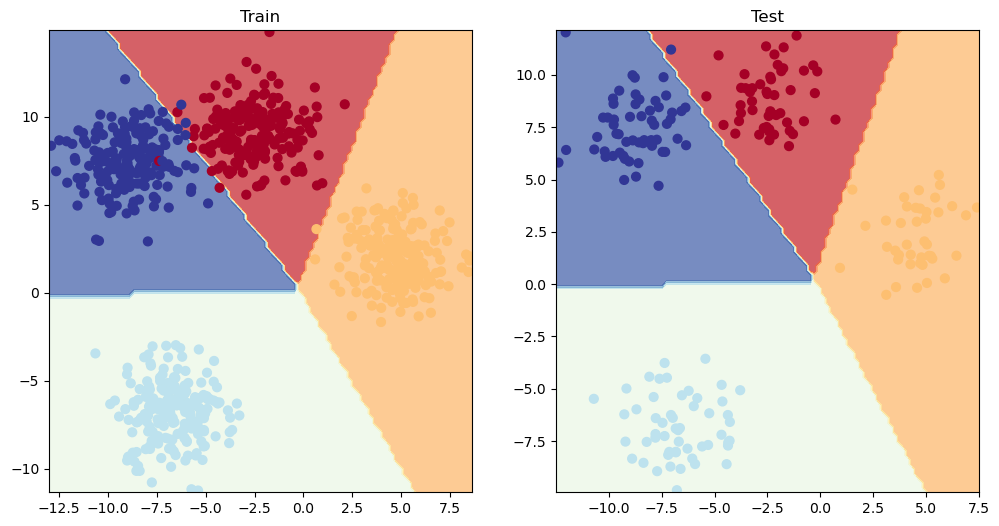

In [176]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)